In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

C:\Users\MeganLee\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


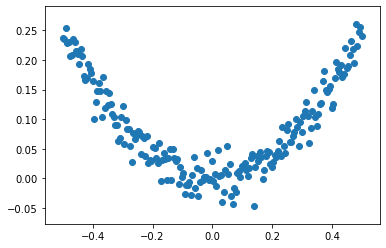

In [2]:
# numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

plt.scatter(x_data, y_data)
plt.show()

cost: 0.09355501
cost: 0.0055081155
cost: 0.004042595
cost: 0.005927542
cost: 0.0013722598
cost: 0.0005808188
cost: 0.0004449034


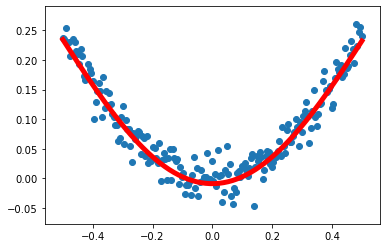

In [3]:
# 构建一个顺序模型
model = tf.keras.Sequential()
# 在模型中添加一个全连接层
# 1-10-1
model.add(tf.keras.layers.Dense(units=10,input_dim=1,activation='tanh'))
model.add(tf.keras.layers.Dense(units=1,activation='tanh'))
# 定义优化算法
sgd = SGD(lr=0.3)
# sgd:Stochastic gradient descent，随机梯度下降法
# mse:Mean Squared Error，均方误差
model.compile(optimizer=sgd,loss='mse')

# 训练3001个批次
for step in range(3001):
    # 每次训练一个批次
    cost = model.train_on_batch(x_data,y_data)
    # 每500个batch打印一次cost值
    if step % 500 == 0:
        print('cost:',cost)

# x_data输入网络中，得到预测值y_pred
y_pred = model.predict(x_data)

# 显示随机点
plt.scatter(x_data,y_data)
# 显示预测结果
plt.plot(x_data,y_pred,'r-',lw=5)
plt.show()

In [4]:
model.weights     # 查看权值

[<tf.Variable 'dense/kernel:0' shape=(1, 10) dtype=float32, numpy=
 array([[ 0.14122696, -1.2677358 ,  0.6176959 , -0.9156462 ,  0.04553681,
         -1.3199645 , -0.1892636 ,  0.02341219, -0.60944664, -0.1920443 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.24865098,  0.50335574,  0.00262351, -0.34697425,  0.34394464,
        -0.579738  , -0.02245927,  0.2389296 ,  0.14173529,  0.00075486],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 1) dtype=float32, numpy=
 array([[ 0.5147708 ],
        [-0.79489785],
        [ 0.0410406 ],
        [ 0.3846166 ],
        [ 0.5975183 ],
        [ 0.8827805 ],
        [-0.06397271],
        [ 0.43139237],
        [-0.385557  ],
        [-0.00511397]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.5785244], dtype=float32)>]

In [5]:
model.get_layer('dense').get_weights()    # 获取第一层权值

[array([[ 0.14122696, -1.2677358 ,  0.6176959 , -0.9156462 ,  0.04553681,
         -1.3199645 , -0.1892636 ,  0.02341219, -0.60944664, -0.1920443 ]],
       dtype=float32),
 array([ 0.24865098,  0.50335574,  0.00262351, -0.34697425,  0.34394464,
        -0.579738  , -0.02245927,  0.2389296 ,  0.14173529,  0.00075486],
       dtype=float32)]

In [6]:
model.get_layer('dense_1').get_weights()

[array([[ 0.5147708 ],
        [-0.79489785],
        [ 0.0410406 ],
        [ 0.3846166 ],
        [ 0.5975183 ],
        [ 0.8827805 ],
        [-0.06397271],
        [ 0.43139237],
        [-0.385557  ],
        [-0.00511397]], dtype=float32), array([0.5785244], dtype=float32)]